In [57]:
from nltk.lm import KneserNeyInterpolated
from nltk.lm.preprocessing import padded_everygram_pipeline, flatten, pad_both_ends
from nltk.util import everygrams
from nltk import word_tokenize, sent_tokenize
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import string

## Read in lyrics data

Song `The Art of Peer Pressure` chosen as an example of a narrative based rap.

Song `Money Trees` chosen as an example of a non-narrative based rap.

In [72]:
df = pd.read_csv('songs_with_transcription.csv')

song_title = 'The Art of Peer Pressure'
song_title_x = 'Money Trees'

In [73]:
lyrics = df[df['song_title'] == song_title]['lyrics'].values[0]
lyrics_x = df[df['song_title'] == song_title_x]['lyrics'].values[0]

## Define functions for training language model

`KneserNeyInterpolated` uses an interpolated smoothing technique as defined by Chen & Goodman 1995 https://dash.harvard.edu/bitstream/handle/1/25104739/tr-10-98.pdf?sequence=1.

Bigrams used but model scales to any ngram >=2.

In [74]:
def text_by_line(lyrics):
    return [list(map(str.lower, word_tokenize(sent))) for sent in lyrics.splitlines()]

In [75]:
def make_training_data(lines):
    test = lines[-1]
    train = lines[:-1]
    return test, train

def perplexity_by_line(text, n):
    perplexity_scores = []
    lines = text_by_line(text)
    
    for i in range(2, len(lines)):
        model = KneserNeyInterpolated(n)
        
        test_text, train_text = make_training_data(lines[:i])
        
        train_data, padded_sents_train = padded_everygram_pipeline(n, train_text)
        padded_bigrams = list(pad_both_ends(test_text, n=n))
    
        model.fit(train_data, padded_sents_train)
        test = list(everygrams(padded_bigrams, max_len=n))
        perp = model.perplexity(test)

        perplexity_scores.append(perp)
    
    return perplexity_scores, model

## Scores for narrative-based rap

In [76]:
def pprint_scores(song_title, scores):
    print(f'----Perplexity score summary for: {song_title}----')
    print('')
    print(f'Max perplexity score: {np.max(scores)}')
    print(f'Min perplexity score: {np.min(scores)}')
    print(f'Median perplexity score: {np.median(scores)}')
    print(f'Mean perplexity score: {np.mean(scores)}')

In [77]:
n = 2

perplexity_scores, model = perplexity_by_line(lyrics, n)
pprint_scores(song_title, perplexity_scores)

----Perplexity score summary for: The Art of Peer Pressure----

Max perplexity score: 911.32853165857
Min perplexity score: 5.409937313338091
Median perplexity score: 251.49495546204358
Mean perplexity score: 261.1545566044926


In [78]:
n = 2

perplexity_scores_x, model_x = perplexity_by_line(lyrics_x, n)
pprint_scores(song_title, perplexity_scores_x)

----Perplexity score summary for: The Art of Peer Pressure----

Max perplexity score: 1160.6205397978215
Min perplexity score: 13.323694382673004
Median perplexity score: 111.44927100822372
Mean perplexity score: 191.35127459625022


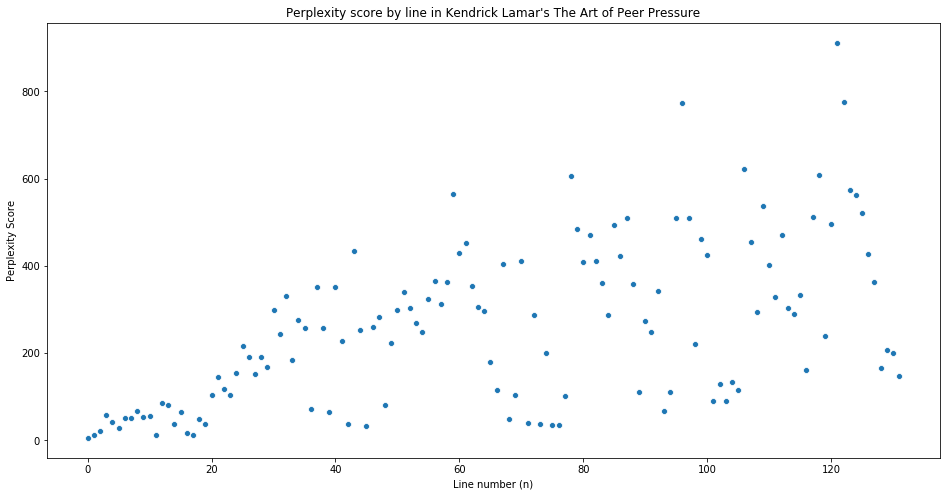

In [79]:
plt.figure(figsize=(16,8))
sns.scatterplot(x=range(len(perplexity_scores)), y=perplexity_scores)
plt.xlabel('Line number (n)')
plt.ylabel('Perplexity Score')
plt.title("Perplexity score by line in Kendrick Lamar's The Art of Peer Pressure")
plt.show()

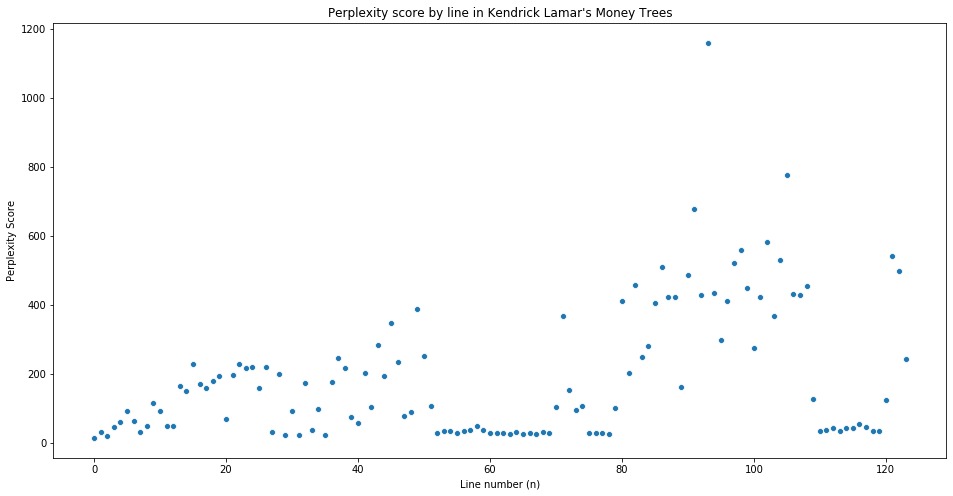

In [80]:
plt.figure(figsize=(16,8))
sns.scatterplot(x=range(len(perplexity_scores_x)), y=perplexity_scores_x)
plt.xlabel('Line number (n)')
plt.ylabel('Perplexity Score')
plt.title("Perplexity score by line in Kendrick Lamar's Money Trees")
plt.show()

## Digging into the data...

Our expectation is that Money Trees would have a higher overall perplexity than The Art of Peer Pressure since Money Trees is more discursive. 

Our data don't support this hypothesis and it seems that this is because of repetition in the choruses of the song bringing the overall perplexity down for the song.

In [84]:
lines = text_by_line(lyrics_x)
lines[53:69]

[['it', 'go', 'halle', 'berry', 'or', 'hallelujah'],
 ['pick', 'your', 'poison', ',', 'tell', 'me', 'what', 'you', 'doin', "'"],
 ['everybody', 'gon', "'", 'respect', 'the', 'shooter'],
 ['but', 'the', 'one', 'in', 'front', 'of', 'the', 'gun', 'lives', 'forever'],
 ['(', 'the', 'one', 'in', 'front', 'of', 'the', 'gun', ',', 'forever', ')'],
 ['and', 'i', 'been', 'hustlin', "'", 'all', 'day'],
 ['this-a-way', ',', 'that-a-way'],
 ['through', 'canals', 'and', 'alleyways', ',', 'just', 'to', 'say'],
 ['money', 'trees', 'is', 'the', 'perfect', 'place', 'for', 'shade'],
 ['and', 'that', "'s", 'just', 'how', 'i', 'feel', ',', 'nah', ',', 'nah'],
 ['a', 'dollar', 'might', 'just', 'fuck', 'your', 'main', 'bitch'],
 ['that', "'s", 'just', 'how', 'i', 'feel', ',', 'nah'],
 ['a',
  'dollar',
  'might',
  'say',
  'fuck',
  'them',
  'niggas',
  'that',
  'you',
  'came',
  'with'],
 ['that', "'s", 'just', 'how', 'i', 'feel', ',', 'nah', ',', 'nah'],
 ['a', 'dollar', 'might', 'just', 'make', 'that